# Spatial Planning and its need for national and regional bibliographies of grey literature
## Jupyter Notebook to get the number of records for a specific query

This python script is counting the records in the [German National Bibliography](http://www.dnb.de/DE/Service/DigitaleDienste/DNBBibliografie/dnbbibliografie_node.html) filtered to specific queries.

Before running this script you have to be an enregistered user in the DNB-Datastore, to get access to the SRU-Protocol. Please register for an API Access-Token

## Configuration

*  Line#1: Set your access-token in the input field or write a hardcoded variable "DNBToken = 'Your-Token'"
*  Line#11: [DDC-Notation](http://www.dnb.de/SharedDocs/Downloads/DE/DNB/service/ddcSachgruppenDNB.html) to filter the national bibliography
*  Line#12: Restrict to a specific year (Write '18' for 2018)
*  Line#13: Choose specific parts ("reihe") of the bibliography
*  Line#14: You can restrict for a specific number of the weekly publication of the bibliography.


In [1]:
DNBToken = input ("Please insert your DNB-API Access-Token")

In [2]:
import xml.etree.ElementTree as ET
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import time

currentYear = time.strftime("%y")

hsgDDC = '620'
jahr = '10'
reiheListe = ('A','B','H','O')
wvnr = '*'
maxRec = '100'
startPos = '1'


def queryBuild(hsgDDC,jahr,reihe,wvnr):
    query = 'hsg%3D' + hsgDDC + '%20'
    #query = '(sw%3DStadt*' + '%20OR%20sw%3DRegion*' + '%20OR%20sw%3DRaum*)' + '%20NOT%20DNS%3DB'
    query = query +  "%20AND%20WVN%3D" + jahr + "%2C"+ reihe +"" + wvnr
    return query


def buildDNBSRUuri(query,DNBToken,maxRec,startPos):
    DNBSRUuri = 'http://services.dnb.de/sru/dnb?version=1.1&operation=searchRetrieve&query='
    DNBSRUuri = DNBSRUuri + query
    DNBSRUuri = DNBSRUuri +  "&maximumRecords="+maxRec+"&startRecord="+startPos+"&recordSchema=MARC21-xml"
    DNBSRUuri = DNBSRUuri + "&accessToken="+DNBToken
    return DNBSRUuri


ns = {'srw' : 'http://www.loc.gov/zing/srw/', 'slim' : 'http://www.loc.gov/MARC21/slim'}




In [3]:
for reihObj in reiheListe:
    objects = ()
    NoR = []
    print (reihObj)
    jahrLoop = jahr
    
    while int(jahrLoop)<(int(currentYear)):
    
        objects= objects + (str(2000+int(jahrLoop)),)
    
        query = queryBuild(hsgDDC,str(jahrLoop),reihObj,wvnr)
        #print(query)
        DNBSRUuri = buildDNBSRUuri(query,DNBToken,maxRec,startPos)
    
        tree = ET.ElementTree(file=urllib.request.urlopen(DNBSRUuri))
        root = tree.getroot()
    
        NoRPar = root.findall(".//srw:numberOfRecords",ns)
        NoR.append(int(NoRPar[0].text))
        jahrLoop = int(jahrLoop)+1


    print(*objects, sep=';')    
    print(*NoR, sep=';')


A
2010;2011;2012;2013;2014;2015;2016;2017
3121;1993;1751;1922;1896;1678;1564;1611
B
2010;2011;2012;2013;2014;2015;2016;2017
1285;670;618;545;681;647;493;704
H
2010;2011;2012;2013;2014;2015;2016;2017
1466;921;775;860;1087;847;695;944
O
2010;2011;2012;2013;2014;2015;2016;2017
5137;3234;7979;7794;6441;7537;8641;7676


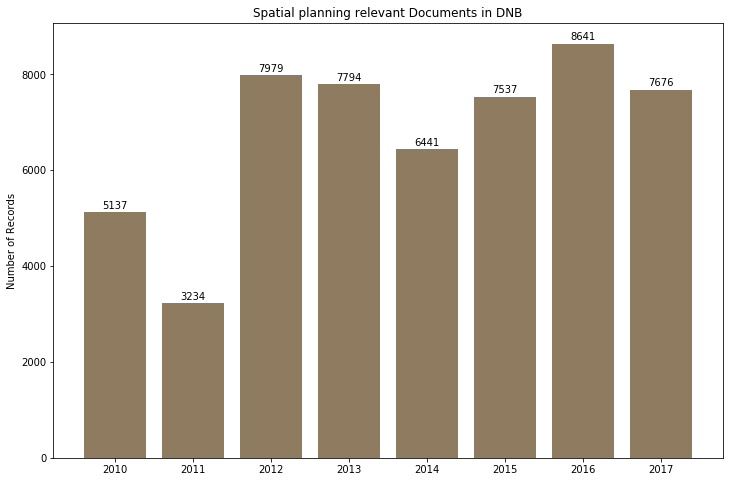

In [4]:
y_pos = np.arange(len(objects))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)


ind=np.arange(len(NoR))
width = 0.35   
rects1 = ax.bar(ind, NoR )

for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                '%d' % int(height),
                ha='center', va='bottom')

plt.bar(y_pos,NoR,align='center',alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Records')
plt.title('Spatial planning relevant Documents in DNB')
 
plt.show()